In [22]:
import sys
import pandas as pd
import numpy as np
sys.path.append('topotests/')
from topotests.topotests import TopoTestOnesample
from sklearn.mixture import GaussianMixture

In [118]:
df = pd.read_csv('Crimes_-_Map.csv')
df[' PRIMARY DESCRIPTION'].unique()

array(['THEFT', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'NARCOTICS',
       'MOTOR VEHICLE THEFT', 'BURGLARY', 'OTHER OFFENSE',
       'PUBLIC PEACE VIOLATION', 'SEX OFFENSE', 'STALKING', 'BATTERY',
       'ASSAULT', 'CRIMINAL SEXUAL ASSAULT', 'ROBBERY',
       'WEAPONS VIOLATION', 'HOMICIDE', 'CRIMINAL TRESPASS',
       'OFFENSE INVOLVING CHILDREN', 'OBSCENITY', 'INTIMIDATION',
       'LIQUOR LAW VIOLATION', 'KIDNAPPING', 'ARSON',
       'OTHER NARCOTIC VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'HUMAN TRAFFICKING', 'PROSTITUTION',
       'CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING', 'NON-CRIMINAL',
       'PUBLIC INDECENCY'], dtype=object)

In [121]:
X = np.array(df[df[' PRIMARY DESCRIPTION']=='ARSON'][['LONGITUDE','LATITUDE']].dropna().loc[(df!=0).any(axis=1)])
Y = np.array(df[df[' PRIMARY DESCRIPTION']=='HOMICIDE'][['LONGITUDE','LATITUDE']].dropna().loc[(df!=0).any(axis=1)])
df

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JF462937,11/03/2022 07:00:00 PM,031XX S ASHLAND AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,N,N,912,12.0,06,NaN,NaN,NaN,NaN,NaN
1,JF463363,11/03/2022 09:00:00 PM,025XX N ELSTON AVE,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,N,N,1432,1.0,06,NaN,NaN,NaN,NaN,NaN
2,JF461531,11/03/2022 01:00:00 PM,028XX N MERRIMAC AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,STREET,N,N,2511,30.0,14,NaN,NaN,NaN,NaN,NaN
3,JF502909,12/08/2022 11:30:00 AM,021XX N ELSTON AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,OTHER (SPECIFY),N,N,1432,32.0,11,NaN,NaN,NaN,NaN,NaN
4,JF491558,11/18/2022 04:50:00 AM,007XX S Wells St,0810,THEFT,OVER $500,RESIDENCE - GARAGE,N,N,123,25.0,06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257288,JG364916,07/31/2023 12:00:00 AM,064XX S RHODES AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,RESIDENCE,N,Y,312,20.0,04B,1181010.0,1862410.0,41.777700,-87.611960,"(41.777700447, -87.611960085)"
257289,JG149582,01/28/2023 11:31:00 PM,038XX W 59TH ST,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,RESIDENCE,N,N,822,23.0,11,1151739.0,1865206.0,41.785997,-87.719196,"(41.785996793, -87.719195501)"
257290,JG305358,06/18/2023 01:05:00 AM,012XX N STATE PKWY,0496,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,APARTMENT,Y,Y,1824,2.0,04B,1176068.0,1908513.0,41.904323,-87.628691,"(41.904322962, -87.628690783)"
257291,JF529073,12/31/2022 04:00:00 PM,024XX E 79TH ST,0560,ASSAULT,SIMPLE,RESTAURANT,N,N,422,7.0,08A,1193792.0,1853060.0,41.751740,-87.565408,"(41.751739567, -87.565407903)"


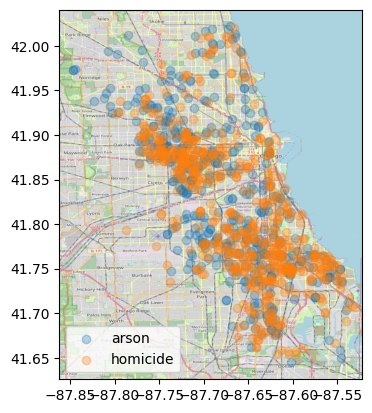

(-87.8619661657, -87.5222528643)
(41.62575073075, 42.04070276825)


In [124]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('map.png')

f,ax = plt.subplots()
ax.imshow(img, extent=(-87.8619661657, -87.5222528643,41.62575073075,42.04070276825))
ax.scatter(X[:,0],X[:,1], alpha=0.3, label='arson')
ax.scatter(Y[:,0],Y[:,1], alpha=0.3,label='homicide')
ax.legend()
plt.show()
print(ax.get_xlim())
print(ax.get_ylim())

# 1 sample test
Let us fit a Gaussian mixture with two components. Is this a good model for the distribution of homicide?

In [125]:
gmm = GaussianMixture(n_components=2)
gmm.fit(Y)

GaussianMixture(n_components=2)

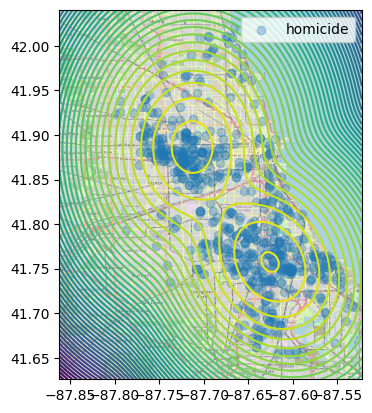

In [137]:

x = np.linspace(-87.8619661657, -87.5222528643, 100)
y = np.linspace(41.62575073075, 42.04070276825, 100)

xx, yy = np.meshgrid(x, y)
pos = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1)), axis = 1)
z = gmm.score_samples(pos) # Note that this method returns log-likehood
# z = np.exp(gmm.score_samples(pos)) # e^x to get likehood values
z = z.reshape(xx.shape)

f,ax = plt.subplots()
ax.imshow(img, extent=(-87.8619661657, -87.5222528643,41.62575073075,42.04070276825))
ax.contour(x, y, z, 50, cmap="viridis")
ax.scatter(Y[:,0],Y[:,1], alpha=0.3,label='homicide')
ax.legend()
plt.show()

In [110]:
from distributions import GaussianMixtureMulti
my_gaussian_mixture = GaussianMixtureMulti(gmm.means_,gmm.covariances_,gmm.weights_)

In [111]:
n = len(df)
alpha=0.05
tt = TopoTestOnesample(n=n, dim=2, significance_level=alpha)
tt.fit(rv=my_gaussian_mixture, n_signature=1000)

In [86]:
tt.predict(X)

TopoTestResult(statistic=0.21460643185298722, pvalue=0.0)

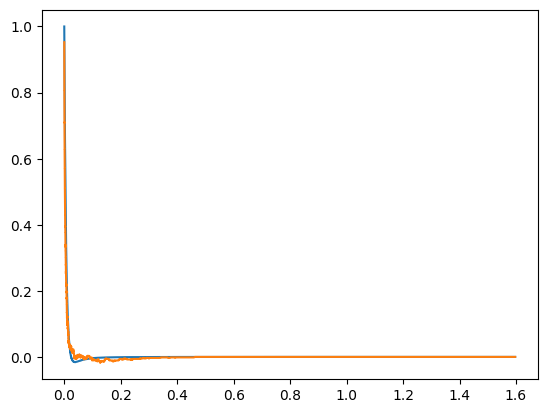

In [87]:
f,ax = plt.subplots()

ax.plot(tt.representation.xs,tt.representation.representation)
ecc_trafo = tt.representation.transform([np.array(df)])
ax.plot(tt.representation.xs,ecc_trafo[1][0])
#ax.set_xlim((-1e9,0.5e11))
plt.show()

# 2 sample test

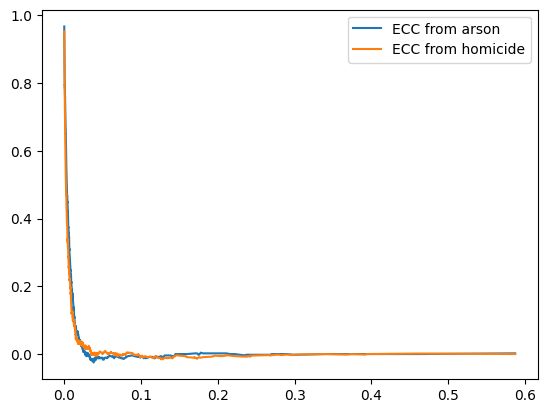

In [135]:
from ecc import ecc_representation
ecc_rep = ecc_representation()
dists, eccs = ecc_rep.fit_transform(samples=[X,Y])
f,ax = plt.subplots()
ax.plot(ecc_rep.xs,eccs[0], label='ECC from arson')
ax.plot(ecc_rep.xs,eccs[1], label='ECC from homicide')
ax.legend()

plt.show()

In [136]:
from topotests.topotests import TopoTestTwosample
TopoTestTwosample(X1=X, X2=Y)

TopoTestResult(statistic=0.12216589145811652, pvalue=0.0)